<a href="https://colab.research.google.com/github/damarismuli/Predicting-the-sale-of-housing-prices/blob/main/Predicting_the_sale_of_housing_prices_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Defining the Question**


a) Specifying the Question

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

b) Defining the Metric for Success

To determine the model that will result to most accurate prediction for the prices of the houses.

c) Understanding the context

Real estate is real property that consists of land and improvements, which include buildings, fixtures, roads, structures, and utility systems. There are alot of factors that are considered before a prospecive buyer buys a house.The factors include size of the house,location, features of the house and number of bedrooms.Knowing the factors that affect the housing sale prices is essential for any real estate company. 



d) Recording the Experimental Design

In this project ,i imported the necessary libraries,loaded and explored datasets,Cleaned and verified data, performed Exploratory Data Analysis;Univariate, Bivariate and Multivariate Analysis to check on one variable, relationships and differences between different independent variables and the coorelation of the variables respectively.Then performed modeling using Multiple Linear Regression,Quantile Regression,Ridge Regression,Lasso Regression and Elastic Net Regression

e) Data Relevance



The data provided was very relevant to the project and it contained numerical values.
http://bit.ly/IndependentProjectWeek7Dataset

**2.Reading the Data**

In [ ]:
#Importing Our Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Loading Our Dataset
# ---
#Loading directly from url
url = 'http://bit.ly/IndependentProjectWeek7Dataset'
df = pd.read_csv(url)
df

### loading our datset using csv file after downloading it
###url = pd.read_csv('house_data.csv')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**3. Checking the Data**

In [ ]:
# Determining the no. of records in the ranking dataset
#
df.shape

(21613, 20)

In [ ]:
# previewing the number of columns
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Previewing the top 5 rows of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Previewing the last 5 rows of our dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype 
#
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# checking the information about our dataset
#
df.info

<bound method DataFrame.info of                id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft

In [ ]:
# understanding our dataset
#
df.describe

<bound method NDFrame.describe of                id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sq

**4. Data cleaning**

In [ ]:
# Identifying the Missing Data on our dataset
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#checking for duplicates in our dataset
df.duplicated().sum()

3

In [ ]:
# Dealing with duplicate 
#drop all duplicates
# 
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

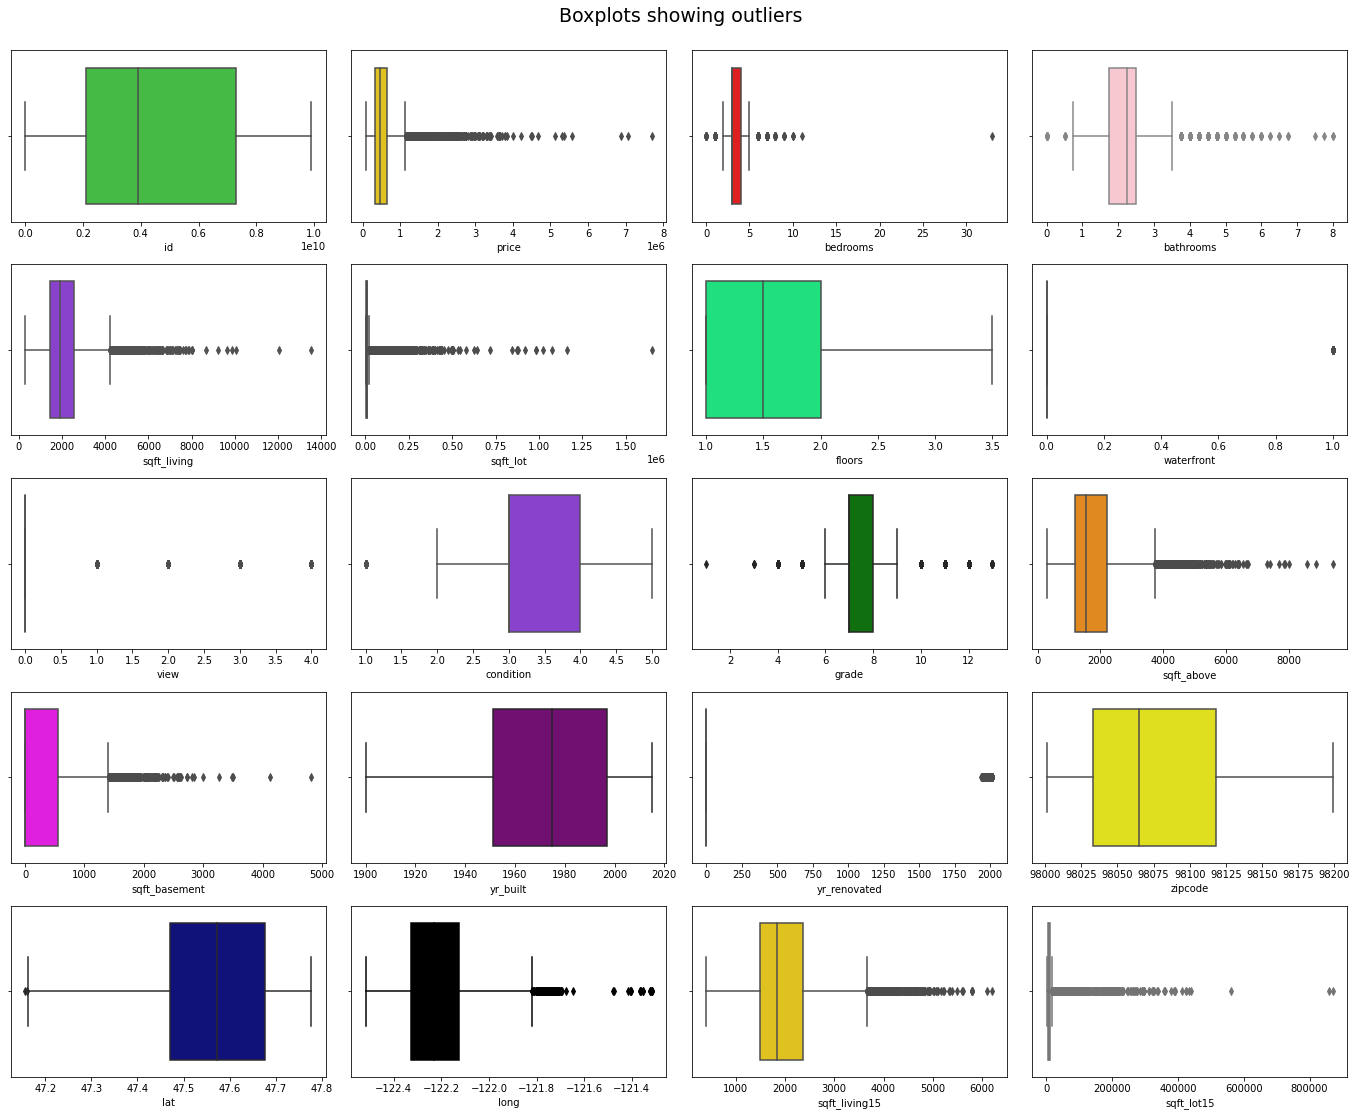

In [ ]:
# checking for outliers
fig, axes = plt.subplots(nrows =5, ncols = 4, figsize = (19, 15))
colors = ['limegreen', 'gold', 'red', 'pink', 'blueviolet','darkorange','springgreen','red','fuchsia','blueviolet','green','darkorange','magenta', 'purple', 'orange','yellow','darkblue', 'black', 'gold', 'silver']
columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), df, columns, colors):
    sns.boxplot(df[column], ax = ax, color = color)
plt.tight_layout()

We'll will not take any action to deal with outliers since they contain necessary values for our prediction.



**5. Exploratory Data Analysis**

Univalent Analysis

In [ ]:
#Summary statistics

df.describe(include='all')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


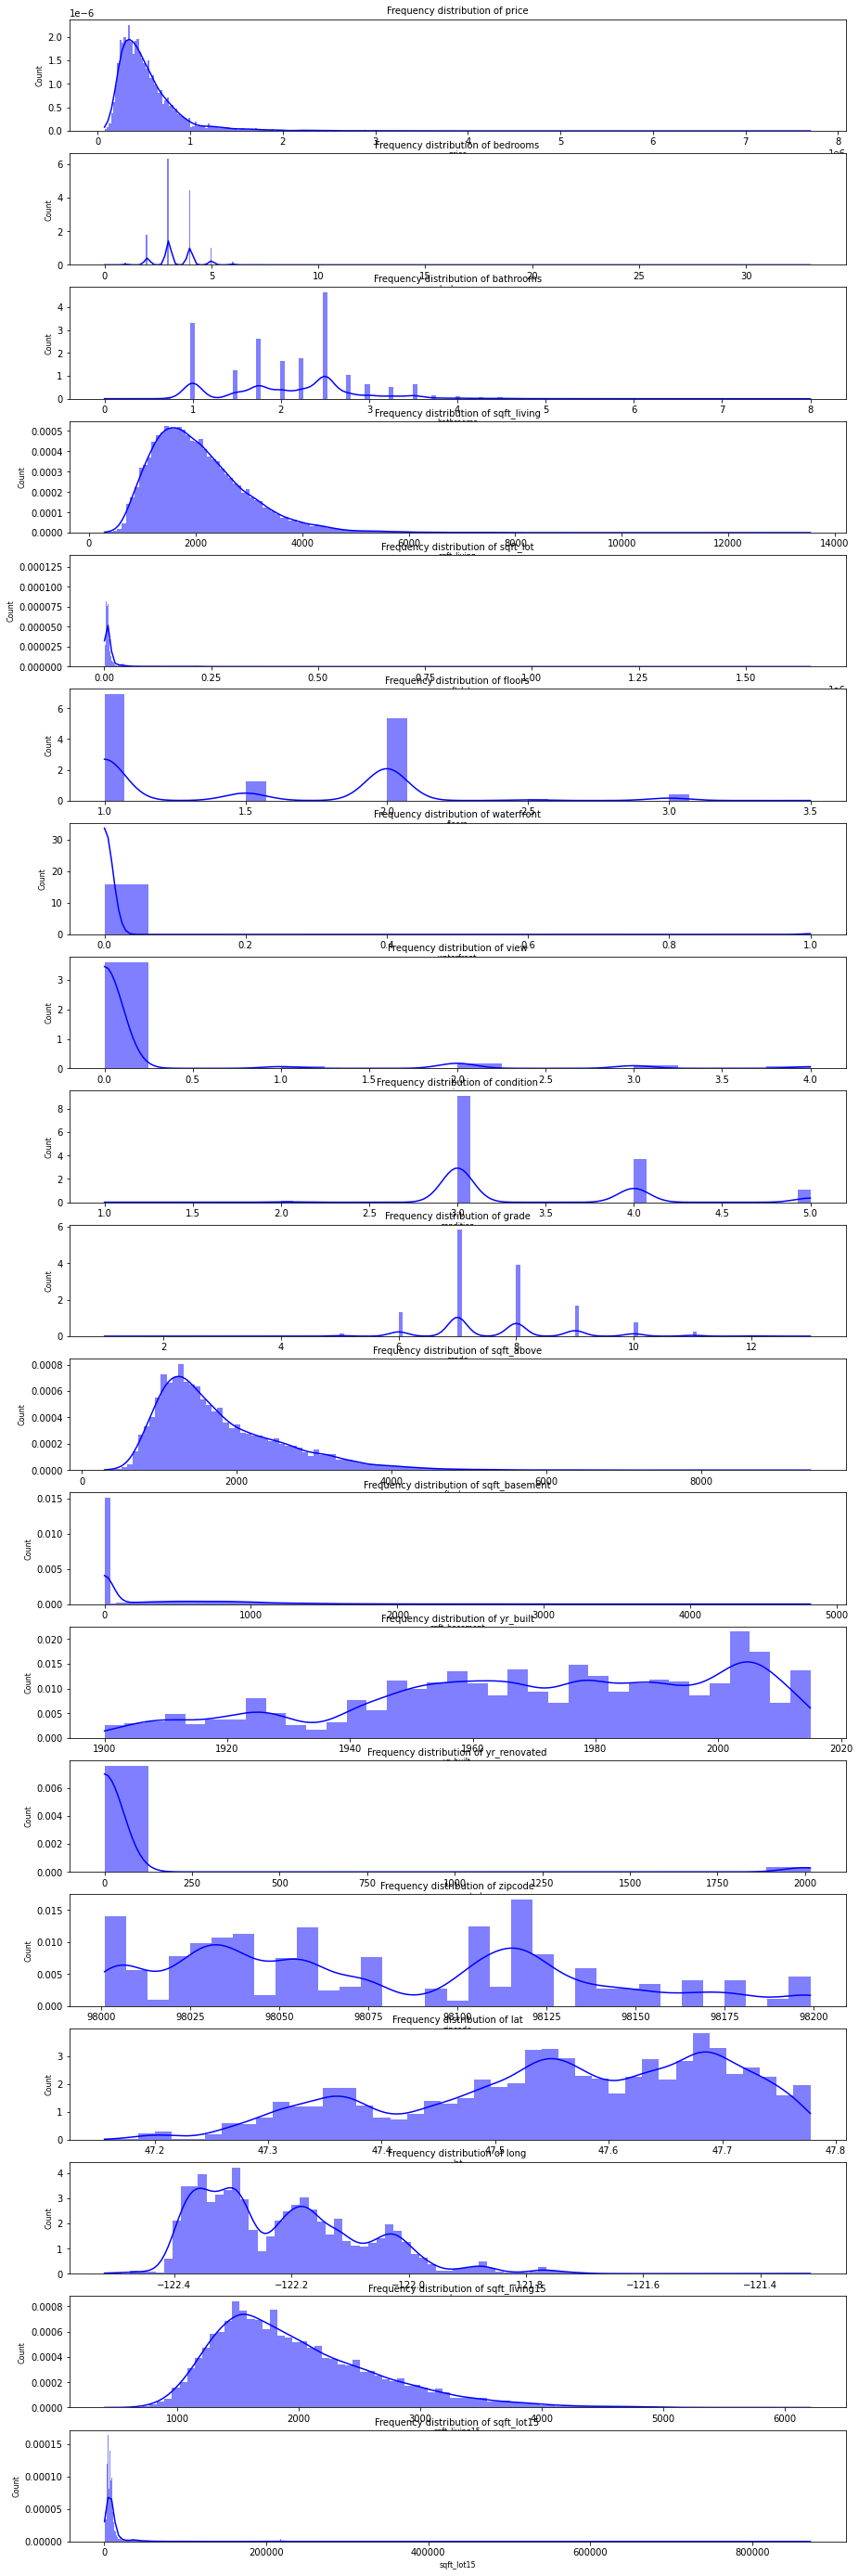

In [ ]:
#Checking data distribution using histogram
# distribution of numerical variables.
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(15,50))

for i, col_val in enumerate(col_names):

    
    sns.histplot(df[col_val], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()




b) Bivalent Analysis

In [ ]:
#Summary statistics

df.describe(include='all')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


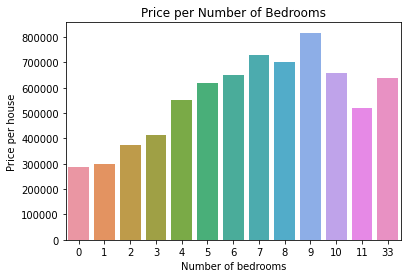

In [ ]:
# Visualization of price versus bedrooms

ax = sns.barplot(x = 'bedrooms', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Number of bedrooms',
       ylabel='Price per house',
       title='Price per Number of Bedrooms')
plt.show()

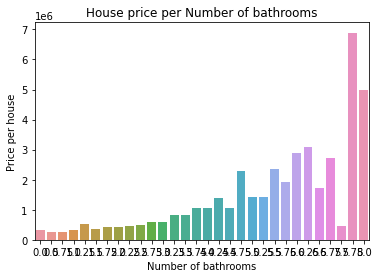

In [ ]:
# Visualization of price versus No of Bath rooms

ax = sns.barplot(x = 'bathrooms', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Number of bathrooms',
       ylabel='Price per house',
       title='House price per Number of bathrooms')
plt.show()

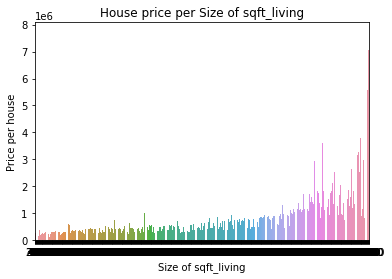

In [ ]:
# Visualization of price versus sqft_living

ax = sns.barplot(x = 'sqft_living', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Size of sqft_living',
       ylabel='Price per house',
       title='House price per Size of sqft_living')
plt.show()

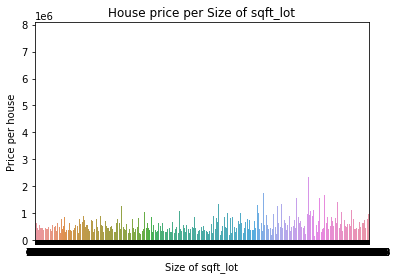

In [ ]:
# Visualization of price versus sqft_lot

ax = sns.barplot(x = 'sqft_lot', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Size of sqft_lot',
       ylabel='Price per house',
       title='House price per Size of sqft_lot')
plt.show()

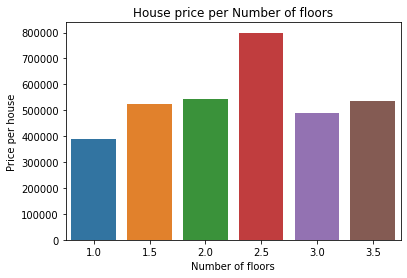

In [ ]:
# Visualization of price versus floors

ax = sns.barplot(x = 'floors', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Number of floors',
       ylabel='Price per house',
       title='House price per Number of floors')
plt.show()

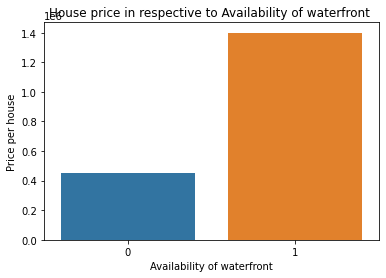

In [ ]:
# Visualization of price versus waterfront

ax = sns.barplot(x = 'waterfront', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Availability of waterfront',
       ylabel='Price per house',
       title='House price in respective to Availability of waterfront ')
plt.show()

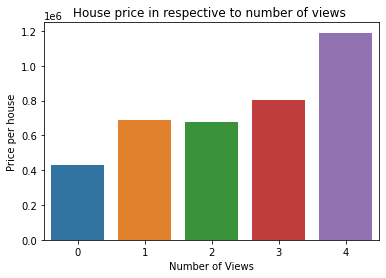

In [ ]:
# Visualization of price versus Views

ax = sns.barplot(x = 'view', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Number of Views',
       ylabel='Price per house',
       title='House price in respective to number of views ')
plt.show()

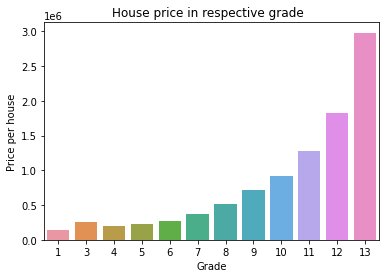

In [ ]:
# Visualization of price versus grade
ax = sns.barplot(x = 'grade', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel='Grade',
       ylabel='Price per house',
       title='House price in respective grade  ')
plt.show()

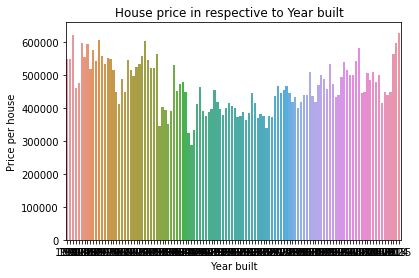

In [ ]:
# Visualization of price versus yr_built
ax = sns.barplot(x = 'yr_built', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel=' Year built',
       ylabel='Price per house',
       title='House price in respective to Year built  ')
plt.show()

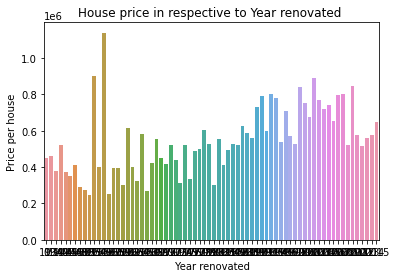

In [ ]:
# Visualization of price versus yr_built
ax = sns.barplot(x = 'yr_renovated', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel=' Year renovated',
       ylabel='Price per house',
       title='House price in respective to Year renovated ')
plt.show()

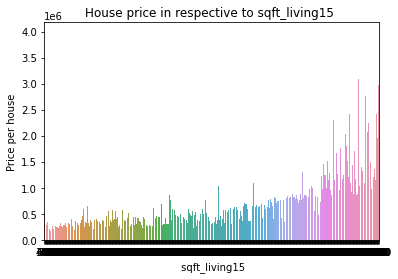

In [ ]:
# Visualization of price versus yr_built
ax = sns.barplot(x = 'sqft_living15', y = 'price', data=df, ci=None, estimator=np.median)
ax.set(xlabel=' sqft_living15',
       ylabel='Price per house',
       title='House price in respective to sqft_living15 ')
plt.show()

Text(0.5, 1.0, 'Price versus Year Built')

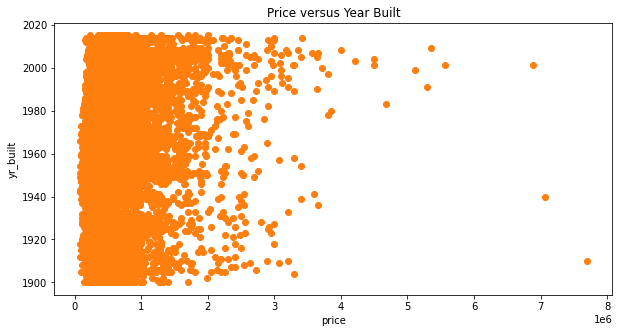

In [ ]:
#scatterplot to visualize priceversus Year renovated
x= df['yr_built']
y=df['price']

plt.subplots(figsize = (10,5))
sns.scatterplot(y, x);
plt.scatter(df.price, df.yr_built)
plt.title('Price versus Year Built')

Text(0.5, 1.0, 'Price versus Year renovated')

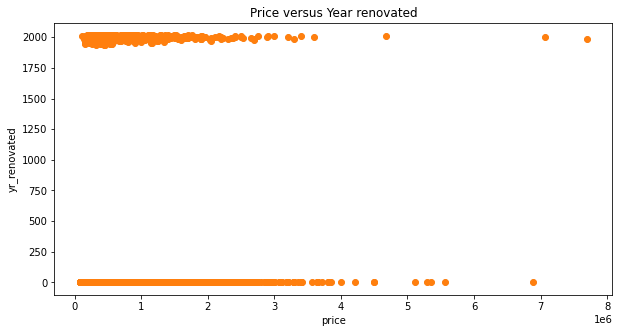

In [ ]:
#scatterplot to visualize price versus Year renovated
x= df['yr_renovated']
y=df['price']

plt.subplots(figsize = (10,5))
sns.scatterplot(y, x);
plt.scatter(df.price, df.yr_renovated)
plt.title('Price versus Year renovated')

Text(0.5, 1.0, 'Price versus Living Area')

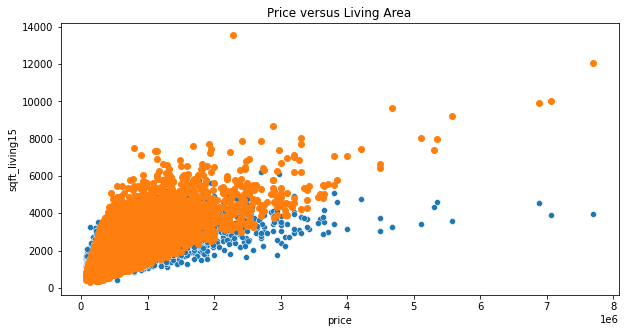

In [ ]:
#scatterplot to visualize price versus living15
x= df['sqft_living15']
y=df['price']

plt.subplots(figsize = (10,5))
sns.scatterplot(y, x);
plt.scatter(df.price, df.sqft_living)
plt.title('Price versus Living Area')

In [ ]:
# correlation between variables
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


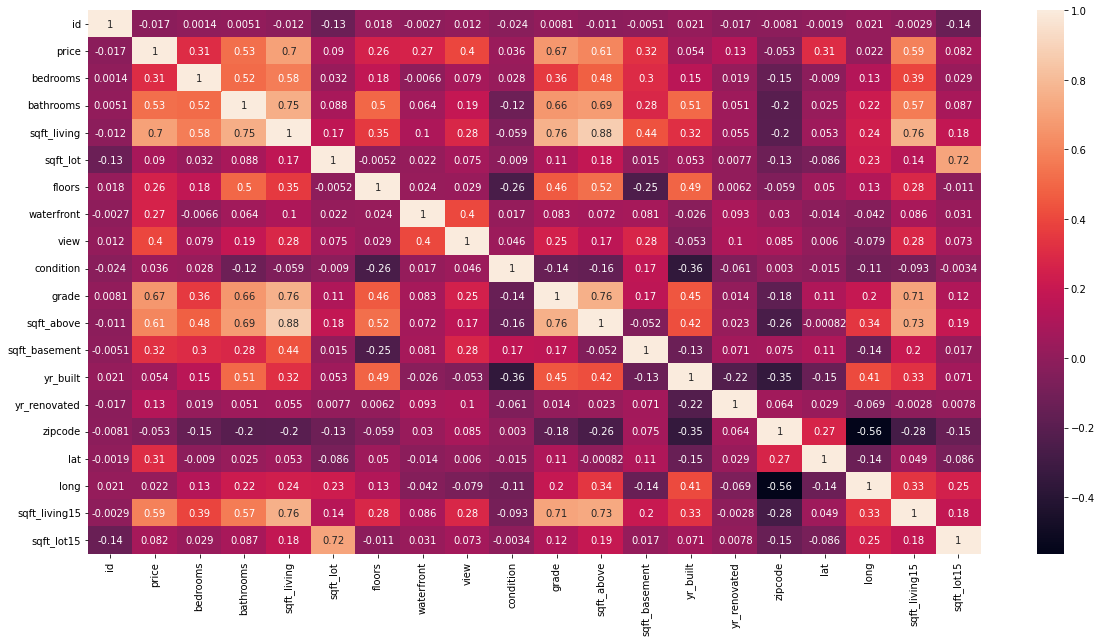

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

**Multivalent Analysis**

Principal component analysis 

In [ ]:
#Separating features and labels 
#preprocessing
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15' ]].values
y = df['price']

In [ ]:
#Import the necessary library
from sklearn.model_selection import train_test_split

#Split the data into a training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Normalisation
#Import the necessary library
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Using PCA
#Import the necessary library
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# checking the explained variance
percentage_explained_variance = pca.explained_variance_ratio_
percentage_explained_variance

array([2.90633627e-01, 1.21742976e-01, 1.03376826e-01, 7.55668835e-02,
       6.70512557e-02, 5.61998647e-02, 4.83412581e-02, 4.64700354e-02,
       3.67205336e-02, 3.30955685e-02, 2.79949457e-02, 2.24946378e-02,
       1.79471153e-02, 1.51774702e-02, 1.40997512e-02, 1.24613518e-02,
       1.06259004e-02, 3.78477053e-33])

**6. Implementing the Solution**

Multiple Linear Regression

In [ ]:
#separating independent and dependent variable
# Defining our x and y
#X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
 #      'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
  #     'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
  #     'sqft_living15', 'sqft_lot15']].values
#y = df['price']

X = df.iloc[:,1:-1].values
y = df.iloc[:,-1] .values

In [ ]:
##splitting dataset into training and testing dataset
#Train using 80% of the data # train percentage size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

348865208.71928644


In [ ]:
# regression intercept
regressor.intercept_

1388959.836677137

In [ ]:
# regression co-efficient
regressor.coef_

array([-3.36325168e-03, -1.26371931e+03, -9.98053408e+02,  1.88402024e+00,
        4.57819660e-01, -1.84140194e+03,  4.92315318e+03,  2.55335058e+02,
        6.52384319e+02, -6.42510582e+02,  1.80393051e+00,  8.00897251e-02,
        6.70336581e+00,  8.74824650e-01,  2.35315891e+00,  1.81533770e+02,
        1.33686718e+04,  2.17425303e+00])

In [ ]:
for i in range(10):
    print(regressor.coef_[i])

-0.003363251680162663
-1263.719306169498
-998.0534075279799
1.884020239720006
0.4578196601138022
-1841.4019443046875
4923.153175070897
255.33505781945541
652.3843186686183
-642.5105819089906


In [ ]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,4322.000000,4322.000000
mean,12844.363026,12509.344421
std,26007.674488,18902.632937
min,750.000000,-3495.350754
25%,5029.000000,6305.025106
50%,7580.500000,9254.241471
75%,10157.250000,12859.020744
max,422967.000000,542958.105110


In [ ]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5652.646254755376
Mean Squared Error: 372805021.62527657
Root Mean Squared Error: 19308.15945721592


In [ ]:
# root mean squared error for X-train
RMSE=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
RMSE

18517.0260974269

In [ ]:
# regressor score
regressor.score(X_train,y_train)

0.5505653539366997

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

19366.483811894654

In [ ]:
# finding the random states
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= i)
    a=np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()
    b=np.sqrt(mean_squared_error(y_test,regressor.predict(X_test)))
    if(abs(a-b)>1):
        print(abs(a-b))
        print("RandomState: "+"{}".format(i))

58.32435467873438
RandomState: 0
298.7241033737446
RandomState: 1
596.1559770593267
RandomState: 2
15.144620782961283
RandomState: 3
7.640690359381551
RandomState: 4
1034.9345383639193
RandomState: 5
1013.8015392922352
RandomState: 6
133.93010128261812
RandomState: 7
63.101583113952074
RandomState: 8
347.73674404005214
RandomState: 9
110.8294479512042
RandomState: 10
122.36340259332064
RandomState: 11
414.17527963031534
RandomState: 12
578.1126083332638
RandomState: 13
731.2165633210279
RandomState: 14
278.61594624855206
RandomState: 15
901.5977969207634
RandomState: 16
270.47775958121565
RandomState: 17
44.77683670397164
RandomState: 18
785.0381807820959
RandomState: 19
1070.8919496717135
RandomState: 20
102.84537593066125
RandomState: 21
146.05216778385875
RandomState: 22
154.97269698833952
RandomState: 23
952.5443078181306
RandomState: 24
146.51655879426835
RandomState: 25
424.6489840252034
RandomState: 26
135.50821166534297
RandomState: 27
80.74924420864409
RandomState: 28
528.7574

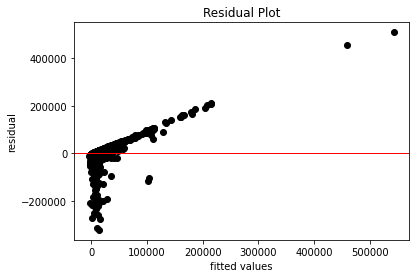

In [ ]:
# Plotting the residual plot
#We've first calculated the  Residuals by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)
# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y =residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# assessing the heteroskedasticity using Barlett's test.

import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than critical value,we reject our null
# hypothesis since it  means that there are patterns to the variance of the data

# If the test_result is smaller than critical value,we accept the null hypothesis  since it means there are no patterns

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous,Not need to reassess')

inf
The variances are homogeneous,Not need to reassess


Quantile Regression

In [ ]:
## preparing the data
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
     'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
   'sqft_living15', 'sqft_lot15']


for i,colval in enumerate(features):
  x = np.array(df[colval].values.reshape(-1,1))
  Y = np.array(df['price'])

#Import necessary Library
import statsmodels.formula.api as smf

# Divide our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=10)

#Finding the regression coefficients for the conditioned median, 
#we will use 0.5 quantile
#

mod = smf.quantreg('Y ~ x', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:             0.004291
Model:                       QuantReg   Bandwidth:                   4.184e+04
Method:                 Least Squares   Sparsity:                    5.636e+05
Date:                Tue, 26 Apr 2022   No. Observations:                21610
Time:                        08:51:06   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.408e+05   2116.378    208.292      0.000    4.37e+05    4.45e+05
x              0.8709      0.070     12.405      0.000       0.733       1.009

The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


In [ ]:
## models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# Storing the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Creating a dataframe bearing same name, to view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1  246613.815208  0.437629        0.349445        0.525814
1  0.2  290256.043346  0.625174        0.521848        0.728499
2  0.3  335757.316978  0.726176        0.609439        0.842912
3  0.4       0.000013  2.692172       -4.521020        9.905364
4  0.5  440825.602843  0.870936        0.733319        1.008553
5  0.6  504306.952099  0.979891        0.816693        1.143089
6  0.7  567787.562906  1.331949        1.169391        1.494507
7  0.8  664736.035626  1.853605        1.661589        2.045621
8  0.9  736697.264082  5.714143        5.549026        5.879260


Mean Squared Error: 134049717310.06
Variance score: 0.01


Text(0.5, 1.0, 'predictors of price')

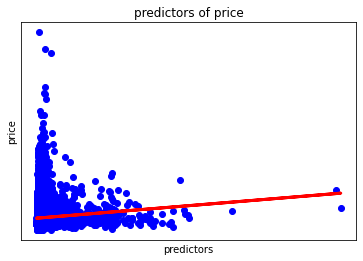

In [ ]:
##  fitting a linear regression

mod = LinearRegression(fit_intercept = True, normalize = False)
mod.fit(x,Y)

Y_predict = mod.predict(x)


print("Mean Squared Error: {0:.2f}"
    .format(np.mean((Y_predict - Y) ** 2)))
print('Variance score: {0:.2f}'.format(mod.score(x, Y)))

plt.figure(2)
plt.scatter(x, Y,  color='blue')
plt.plot(x, Y_predict, color='red',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("predictors")
plt.ylabel("price")
plt.title("predictors of price")

A low variance score of 0.01,means that our linear regression did not result into a good model.

<Figure size 432x288 with 0 Axes>

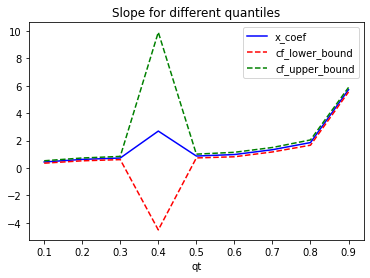

In [ ]:
## Plotting the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])

plt.show()

The Mean squared error of our quantile regression is 134049717310.06 which is higher than our linear regression  372805021.62527657. Hence our linear model performed better than our quntile model

Ridge Regression

In [ ]:
# Importing our libraries
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



In [ ]:
#defining X and Y 
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
     'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
   'sqft_living15', 'sqft_lot15' ]].values
y = df['price']

In [ ]:
# Splitting the dataset into training and testing sets
#
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# determining the most appropriate value for the L2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Using .fit function to run the model
search.fit(x_train,y_train)

#.best_params function and .best_scores_ function to determine the model strength
print(search.best_params_)
abs(search.best_score_)

{'alpha': 0.01}


40503829812.75523

In [ ]:
# Fitting our model with the ridge information
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)

#finding the mean squared error 
rid_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(rid_model)

40522796287.947075


The ridge regression model gives us a mean squared error of 40522796287.947075with an alpha of 0.01 but our best score was 40503829812.75527.The ridge regression still has  a lower mean_squared_error of 372805021.62527657 as compared to the multiple linear regression and the quartile  regression

4. Lasso Regression

In [ ]:
#Importing the necessary Libraries
from sklearn.linear_model import Lasso
from sklearn import linear_model
# Scaling data 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the model
# 
lasso.fit(X, y) 

# Print the output
# 
print("The lasso Score is:", lasso.score(X, y)) 
print("The lasso Mean squared Error is:", mean_squared_error(y, lasso.predict(X))) 
print("The lasso Coef is:", lasso.coef_)

The lasso Score is: 0.9999999999925908
The lasso Mean squared Error is: 0.9999999996348167
The lasso Coef is: [367378.08454868      0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.             -0.              0.
      0.              0.        ]


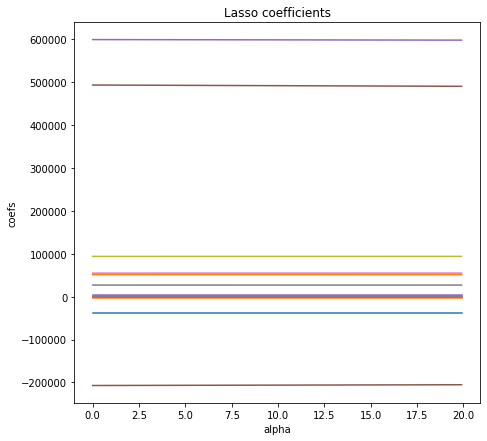

In [ ]:
#Visualizing  lasso coefficients
Lassocoefs = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    Lassocoefs.append(lasso.coef_) 



# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, Lassocoefs)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()


The Lasso Regression model gives us a mean squared error of 0.9999999999925908.
It has a lower MSE as compared to the ridge regression. Hence our Lasso Regression model performed better than our multiple linear regression

5. Elastic Net Regression

In [ ]:
#importing our libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

In [ ]:
#Normalisation
elastic=ElasticNet(normalize=True)

#Creating grid search
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [ ]:
# fitting our model.
# 
search.fit(X,y)

#Display the best parameters 
print(search.best_params_)

#Dislaying best results 
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


501003947.7134597

In [ ]:
# Setting Hyperparameters to recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-04,l1_ratio=0.6)
elastic.fit(x_train,y_train)
model_mean_squared_error=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(x_test)))
print('Our MSE is :',model_mean_squared_error)


Our MSE is : 48586560263.62179


The Mean squared error of our Elastic Net Regression is 48586560263.62179 which is higher than our Lasso regression  mean squared error of  0.9999999999925908. Hence our Lasso model performed better than our Multiple Linear Regression

**7. Follow up questions**

a). Did we have the right data?Yes

b). Was the provided data enough to answer our question?Yes

**8. Conclusion**

From the above analysis we conclude, lasso regression model performed best compared to other models.It produced the lowest mean squared error.Therefore, themodel  could result to most accurate prediction for the prices of the houses.

However we cannot fully depend on lasso regression, our solution can can be challenged by further analysis of housing pricing data available so as to further improve the model.
